# Text Mining

Hi everyone, <br />

This session is about text mining. 

It will walk you though the following sections:

1. Text pre-processing
2. Term Frequency analysis (TF)
3. Inverse Document Frequency (IDF)
4. Term Frequency - Inverse Document Frequency (TF-IDF)
5. Text classification
6. Sentiment analysis

** Before Starting, let us import some basic text mining tools**

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*- 
# Basic imports
import pickle
from pprint import pprint
import collections
import numpy as np
import matplotlib.pyplot as plt
import operator

# Natural Language Tool Kit (NLTK) imports
import nltk
from nltk.data  import load
from nltk.tokenize.treebank import TreebankWordTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Machine Learning Library (sklearn) imports
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

In [2]:
# Instantiate objects from NLTK
sentence_splitter = load('tokenizers/punkt/english.pickle')
tokenizer = TreebankWordTokenizer()
stemmer = PorterStemmer()

For this text mining session, we will use **reviews from Amazon**. These reviews correspond to product reviews from 4 product types 
* Books
* DVD
* Electronics
* Kitchen Appliances

For each review, we know the sentiment associated to it.

**Book** 

"*What a waste of time. This was like sitting through a very boring business course.*"

"*An excellent, well explained art book, with beautiful and easy to follow illustrations. The book is a treasure chest of ideas suitable for the primary classroom. This book provides plenty of opportunities to explore the various strands of the visual arts field. A great resource for any teacher, parent or doting aunt*"

**DVD** 

"*The sound on this DVD is absolutely horrible.  The dialogue is at a much lower volume than the music and sound effects, making it impossible to view without constantly tinkering.  I also have the VHS, on which the sound is perfect, so I can still watch this wonderful movie.  But I would sure like to get my money back for the DVD*"

**Electronics** 

"*Terrible Design did not fit my car's electical outlet, it does not work with my Jeep Liberty.  The jack construction is defective does not even power on*"

**Kitchen appliances** 

"*Great blender! I use it daily to make smoothies and it never fails. Powerful motor purees frozen fruits great!! Simple--only two speeds. Easy clean-up *"
 

## 1. Text pre-processing

### 1.1  Split into sentences

In [3]:
review = """What a waste of time. This was like sitting through a very boring business course."""
for sentence in sentence_splitter.tokenize(review):
    pprint(sentence)

'What a waste of time.'
'This was like sitting through a very boring business course.'


### 1.2 Split sentence into tokens

In [4]:
sentence = """This was like sitting through a very boring business course."""
for token in tokenizer.tokenize(sentence):
    pprint(token)

'This'
'was'
'like'
'sitting'
'through'
'a'
'very'
'boring'
'business'
'course'
'.'


### 1.3 Convert tokens to lower case

In [5]:
tokenized_sentence = ['This','was','like','sitting','through','a','very','boring','business','course','.']
for token in tokenized_sentence:
    token = token.lower()
    pprint(token)

'this'
'was'
'like'
'sitting'
'through'
'a'
'very'
'boring'
'business'
'course'
'.'


### 1.4 Remove punctuation

In [6]:
punctuation = set([",", ".", ";", "/", ":", "-", "--" ,"!", "?", "(", ")","'",'"',"''", "``"])
tokenized_sentence = ['this','was','like','sitting','through','a','very','boring','business','course','.']
for token in tokenized_sentence:
    if token not in punctuation:
        pprint(token)

'this'
'was'
'like'
'sitting'
'through'
'a'
'very'
'boring'
'business'
'course'


### 1.5 Remove stop words

In [7]:
stopwords_set = set(stopwords.words('english'))
pprint(stopwords_set)

set([u'a',
     u'about',
     u'above',
     u'after',
     u'again',
     u'against',
     u'ain',
     u'all',
     u'am',
     u'an',
     u'and',
     u'any',
     u'are',
     u'aren',
     u'as',
     u'at',
     u'be',
     u'because',
     u'been',
     u'before',
     u'being',
     u'below',
     u'between',
     u'both',
     u'but',
     u'by',
     u'can',
     u'couldn',
     u'd',
     u'did',
     u'didn',
     u'do',
     u'does',
     u'doesn',
     u'doing',
     u'don',
     u'down',
     u'during',
     u'each',
     u'few',
     u'for',
     u'from',
     u'further',
     u'had',
     u'hadn',
     u'has',
     u'hasn',
     u'have',
     u'haven',
     u'having',
     u'he',
     u'her',
     u'here',
     u'hers',
     u'herself',
     u'him',
     u'himself',
     u'his',
     u'how',
     u'i',
     u'if',
     u'in',
     u'into',
     u'is',
     u'isn',
     u'it',
     u'its',
     u'itself',
     u'just',
     u'll',
     u'm',
     u'ma',
     u'me',
  

In [9]:
tokenized_sentence = ['this','was','like','sitting','through','a','very','boring','business','course']
for token in tokenized_sentence:
    if token not in stopwords_set:
        pprint(token)

'like'
'sitting'
'boring'
'business'
'course'


### 1.6 Stemming

In [8]:
tokenized_sentence = ['like','sitting','boring','business','course']
for token in tokenized_sentence:
    stem = stemmer.stem(token)
    pprint(stem)

'like'
u'sit'
u'bore'
u'busi'
u'cours'


### 1.7 All together

In [10]:
# Preprocess a given text
def preprocess_text(review):
    tokens = []
    # 1. Split into sentences
    for sentence in sentence_splitter.tokenize(review):
        # 2. Split into tokens
        for token in tokenizer.tokenize(sentence):
            token = token.lower()
            # 3. Filter on stoplist and punctuation
            if token not in stopwords_set and token not in punctuation:
                # 4. Stemming (takes root)
                stem = stemmer.stem(token)
                tokens.append(stem)
    return tokens

pprint( preprocess_text("""An excellent, well explained art book, with beautiful and easy to follow illustrations. 
The book is a treasure chest of ideas suitable for the primary classroom. 
This book provides plenty of opportunities to explore the various strands of the visual arts field. 
A great resource for any teacher, parent or doting aunt"""))

[u'excel',
 'well',
 u'explain',
 'art',
 'book',
 u'beauti',
 u'easi',
 'follow',
 u'illustr',
 'book',
 u'treasur',
 'chest',
 u'idea',
 u'suitabl',
 u'primari',
 'classroom',
 'book',
 u'provid',
 u'plenti',
 u'opportun',
 u'explor',
 u'variou',
 u'strand',
 'visual',
 u'art',
 'field',
 'great',
 u'resourc',
 'teacher',
 'parent',
 u'dote',
 'aunt']


## 2 Term Frequency analysis (TF)

A central question in text mining and natural language processing is how to quantify what a document is about.

One measure of how important a word may be is its **term frequency** (tf), how often a word occurs in a document

### 2.1 Without pre-processing

#### Book reviews

In [11]:
# Some previews of reviews
with open('data/sorted_data_acl/books/positive_text.review', 'r') as myfile:
    pos_books = myfile.readlines()
    
    print'------'
    pprint(pos_books[0])
    print'------'
    pprint(pos_books[1])
    print'------'
    pprint(pos_books[2])
    print'------'

------
' Sphere by Michael Crichton is an excellant novel. This was certainly the hardest to put down of all of the Crichton novels that I have read.   The story revolves around a man named Norman Johnson. Johnson is a phycologist. He travels with 4 other civilans to a remote location in the Pacific Ocean to help the Navy in a top secret misssion. They quickly learn that under the ocean is a half mile long spaceship. The civilans travel to a center 1000 feet under the ocean to live while researching the spacecraft. They are joined by 5 Navy personel to help them run operations. However on the surface a typhoon comes and the support ships on the surface must leave. The team of ten is stuck 1000 feet under the surface of the ocean. After a day under the sea they find out that the spacecraft is actually an American ship that has explored black holes and has brought back some strange things back to earth.  This novel does not have the research that some of the other Crichton novels have, b

In [12]:
# Merge book reviews together
with open('data/sorted_data_acl/books/positive_text.review', 'r') as myfile:
    pos_book = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/books/negative_text.review', 'r') as myfile:
    neg_book = myfile.read().decode("utf-8")   
book_reviews = pos_book + neg_book

In [13]:
# Split into words, without further pre-processing
tokens = tokenizer.tokenize(book_reviews)

# count frequency of words
counter = collections.Counter(tokens)
pprint(counter.most_common(15))

[(u'the', 16659),
 (u',', 16220),
 (u'of', 10141),
 (u'and', 9703),
 (u'to', 8850),
 (u'a', 8254),
 (u'I', 6058),
 (u'is', 5984),
 (u'in', 5044),
 (u'that', 4364),
 (u'book', 3689),
 (u'this', 3605),
 (u'it', 3414),
 (u"'s", 3048),
 (u'for', 2944)]


#### DVD reviews

In [14]:
# Merge dvd reviews together
with open('data/sorted_data_acl/dvd/positive_text.review', 'r') as myfile:
    pos_dvd = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/dvd/negative_text.review', 'r') as myfile:
    neg_dvd = myfile.read().decode("utf-8")
dvd_reviews = pos_dvd + neg_dvd
    
# Split into words, without further pre-processing
tokens = tokenizer.tokenize(dvd_reviews)

# count frequency of words
counter=collections.Counter(tokens)
pprint(counter.most_common(15))

[(u'the', 16426),
 (u',', 15723),
 (u'and', 9387),
 (u'a', 8236),
 (u'of', 7917),
 (u'to', 7443),
 (u'is', 6149),
 (u'I', 5580),
 (u'in', 4529),
 (u'it', 4011),
 (u'that', 3810),
 (u'this', 3656),
 (u"'s", 3517),
 (u'was', 2637),
 (u'for', 2609)]


As we can see, many common words which do not tell us much about our reviews, are present.

Pre-processing allows us to remove some of the highly frequent common words.

### 2.2 With pre-processing

#### Book reviews

In [15]:
# pre-processing of reviews
book_reviews_prepro = preprocess_text(book_reviews.replace("'",' '))

# count frequency of words
counter=collections.Counter(book_reviews_prepro)
pprint(counter.most_common(15))

[(u'book', 4933),
 (u'read', 1880),
 (u'one', 1497),
 (u'like', 1062),
 (u'time', 865),
 (u'would', 845),
 (u'stori', 801),
 (u'get', 707),
 (u'work', 691),
 (u'good', 677),
 (u'make', 672),
 (u'use', 661),
 (u'author', 638),
 (u'much', 636),
 (u'mani', 631)]


#### DVD reviews

In [16]:
# pre-processing of reviews
dvd_reviews_prepro = preprocess_text(dvd_reviews.replace("'",' '))

# count frequency of words
counter=collections.Counter(dvd_reviews_prepro)
pprint(counter.most_common(15))

[(u'movi', 2763),
 (u'film', 2100),
 (u'one', 1589),
 (u'like', 1268),
 (u'dvd', 986),
 (u'get', 922),
 (u'watch', 904),
 (u'time', 881),
 (u'good', 857),
 (u'make', 777),
 (u'would', 717),
 (u'great', 706),
 (u'see', 702),
 (u'...', 697),
 (u'charact', 692)]


#### Electronics  reviews

In [17]:
# Merge Electronics reviews together
with open('data/sorted_data_acl/electronics/positive_text.review', 'r') as myfile:
    pos_elec = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/electronics/negative_text.review', 'r') as myfile:
    neg_elec = myfile.read().decode("utf-8")
elec_reviews = pos_elec + neg_elec

# pre-processing of reviews
elec_reviews_prepro = preprocess_text(elec_reviews.replace("'",' '))

# count frequency of word
counter=collections.Counter(elec_reviews_prepro)
pprint(counter.most_common(15))

[(u'use', 1399),
 (u'work', 1155),
 (u'one', 1013),
 (u'get', 821),
 (u'good', 655),
 (u'sound', 648),
 (u'would', 645),
 (u'product', 637),
 (u'time', 600),
 (u'great', 569),
 (u'like', 561),
 (u'phone', 501),
 (u'problem', 500),
 (u'buy', 492),
 (u'...', 471)]


#### Kitchen appliance reviews

In [18]:
# Merge Kitchen appliance reviews together
with open('data/sorted_data_acl/kitchen_&_housewares/positive_text.review', 'r') as myfile:
    pos_kitch = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/kitchen_&_housewares/negative_text.review', 'r') as myfile:
    neg_kitch = myfile.read().decode("utf-8")
kitch_reviews = pos_kitch + neg_kitch

# pre-processing of reviews
kitch_reviews_prepro = preprocess_text(kitch_reviews.replace("'",' '))

# count frequency of word
counter=collections.Counter(kitch_reviews_prepro)
pprint(counter.most_common(15))

[(u'use', 1505),
 (u'one', 1005),
 (u'time', 699),
 (u'get', 653),
 (u'make', 621),
 (u'like', 614),
 (u'work', 608),
 (u'pan', 604),
 (u'would', 580),
 (u'great', 547),
 (u'product', 515),
 (u'set', 475),
 (u'coffe', 457),
 (u'well', 457),
 (u'look', 445)]


The words now better quantify our reviews.

However, there are still many **common words** that are not very useful (*one, get, make, even, also, well*), and which are present in all reviews, whetever the category or the sentiment.

We would like to extract truly **distinctive keywords** to better characterise our reviews within each category.

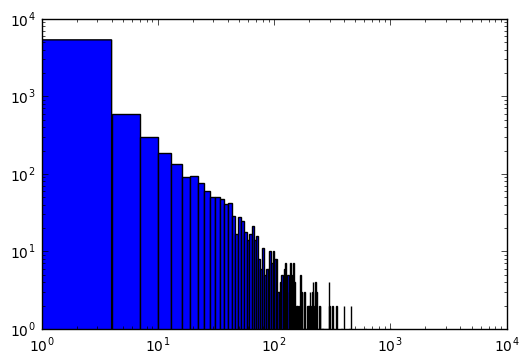

In [19]:
# Distribution of word frequencies
word_frequencies = [float(x) / 1000 for x in counter.values()]
plt.hist(counter.values(), 500)
plt.xscale('log')
plt.yscale('log')
plt.show()

## 3 Inverse Document Frequency (IDF)

One way to correct these frequencies is to look at a term’s inverse document frequency (idf), which decreases the weight for commonly used words and increases the weight for words that are not used very much in a collection of documents.

Let us take an English corpus containing thousands of documents to evaluate the inverse document frequency of english words

#### Load Brown english corpus

In [20]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
from nltk.corpus import brown
brown_corpus = brown.sents()

print "------"
print brown_corpus[0]
print "------"
print brown_corpus[1]
print "------"
print brown_corpus[2]
print "------"

------
[u'The', u'Fulton', u'County', u'Grand', u'Jury', u'said', u'Friday', u'an', u'investigation', u'of', u"Atlanta's", u'recent', u'primary', u'election', u'produced', u'``', u'no', u'evidence', u"''", u'that', u'any', u'irregularities', u'took', u'place', u'.']
------
[u'The', u'jury', u'further', u'said', u'in', u'term-end', u'presentments', u'that', u'the', u'City', u'Executive', u'Committee', u',', u'which', u'had', u'over-all', u'charge', u'of', u'the', u'election', u',', u'``', u'deserves', u'the', u'praise', u'and', u'thanks', u'of', u'the', u'City', u'of', u'Atlanta', u"''", u'for', u'the', u'manner', u'in', u'which', u'the', u'election', u'was', u'conducted', u'.']
------
[u'The', u'September-October', u'term', u'jury', u'had', u'been', u'charged', u'by', u'Fulton', u'Superior', u'Court', u'Judge', u'Durwood', u'Pye', u'to', u'investigate', u'reports', u'of', u'possible', u'``', u'irregularities', u"''", u'in', u'the', u'hard-fought', u'primary', u'which', u'was', u'won', 

#### Pre-process the sentences

In [22]:
preprocessed_sentences = []
for sentence in brown_corpus:
    clean_sentence = preprocess_text(' '.join(sentence))
    preprocessed_sentences.append(" ".join(clean_sentence))

#### Compute Inverse Document Frequency of english words

In [23]:
vectorizer = TfidfVectorizer(stop_words='english')
tf_idf = vectorizer.fit(preprocessed_sentences)
idf = vectorizer.idf_
idf = dict(zip(vectorizer.get_feature_names(), idf))
sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))

#### Most common words accross English documents (Low IDF value)

In [24]:
pprint(sorted_idf[0:20])

[(u'said', 4.3852975302665964),
 (u'time', 4.4300536177651608),
 (u'year', 4.5248792623100664),
 (u'new', 4.6178830452789867),
 (u'like', 4.6509111464338577),
 (u'use', 4.7118296327808586),
 (u'state', 4.7182743382235017),
 (u'man', 4.7556002958361878),
 (u'make', 4.8518057308480245),
 (u'work', 4.9075163378620292),
 (u'day', 4.9637560561849057),
 (u'way', 5.0301941458951411),
 (u'look', 5.0311759820073982),
 (u'mani', 5.0600768474951545),
 (u'come', 5.120511901840799),
 (u'long', 5.1791245854827492),
 (u'good', 5.1848356232782642),
 (u'peopl', 5.1951984103138109),
 (u'world', 5.238966484094175),
 (u'place', 5.2401764055968885)]


#### Most rare words accross English documents (High IDF value)

In [25]:
sorted_idf.reverse()
pprint(sorted_idf[0:20])

[(u'vanc', 11.263623998557922),
 (u'pigen', 11.263623998557922),
 (u'northerli', 11.263623998557922),
 (u'xenon', 11.263623998557922),
 (u'downpay', 11.263623998557922),
 (u'boor', 11.263623998557922),
 (u'worriedli', 11.263623998557922),
 (u'theon', 11.263623998557922),
 (u'recontamin', 11.263623998557922),
 (u'slipp', 11.263623998557922),
 (u'horsewoman', 11.263623998557922),
 (u'libello', 11.263623998557922),
 (u'daffodil', 11.263623998557922),
 (u'mudwagon', 11.263623998557922),
 (u'bratwurst', 11.263623998557922),
 (u'sweatband', 11.263623998557922),
 (u'contradictori', 11.263623998557922),
 (u'footwork', 11.263623998557922),
 (u'piousli', 11.263623998557922),
 (u'warranti', 11.263623998557922)]


## 4 Term Frequency - Inverse Document Frequency (TF-IDF)

Now that we have a measure that quantifies how important a word is within a document (TF) and another one that quantifies how common a word is accross the language (IDF), we can combine them into

**TF-IDF = TF * IDF**

This measure (TF-IDF) attempts to find the words that are important within the document (i.e., high frequency), but not too common across the documents (i.e. in english language in general).

#### TF-IDF of Book reviews

We can now compute the TF-IDF values for each word within a particular category.

Each document can then be represented as a **vector** of TF-IDF values.

In [26]:
# Book review document 
book_doc = " ".join(book_reviews_prepro)
# Compute TF-IDF
result = vectorizer.transform([book_doc])
feature_names = tf_idf.get_feature_names()
tfidf = []
for col in result.nonzero()[1]:
    tfidf.append((feature_names[col],result[0, col]))
sorted_tfidf = sorted(tfidf, key=lambda x: x[1])
sorted_tfidf.reverse()
pprint(sorted_tfidf[0:15])

[(u'book', 0.72413773358744526),
 (u'read', 0.27538827141993177),
 (u'stori', 0.12298503627368282),
 (u'like', 0.11614221200726135),
 (u'charact', 0.097071552969261496),
 (u'author', 0.09564121094383489),
 (u'time', 0.090579081060064723),
 (u'good', 0.083520708978920818),
 (u'work', 0.080664457047949445),
 (u'realli', 0.077258511589321233),
 (u'make', 0.076904639717952902),
 (u'write', 0.076498786335732594),
 (u'novel', 0.075527966727990711),
 (u'mani', 0.074866738623109552),
 (u'use', 0.073139167281455461)]


#### TF-IDF of DVD reviews

In [27]:
# DVD review document 
dvd_doc = " ".join(dvd_reviews_prepro)

# Compute TF-IDF
result = vectorizer.transform([dvd_doc])
feature_names = tf_idf.get_feature_names()
tfidf = []
for col in result.nonzero()[1]:
    tfidf.append((feature_names[col],result[0, col]))
sorted_tfidf = sorted(tfidf, key=lambda x: x[1])
sorted_tfidf.reverse()
pprint(sorted_tfidf[0:15])

[(u'movi', 0.56391529121228801),
 (u'film', 0.38891147315815311),
 (u'like', 0.15260879665206684),
 (u'watch', 0.15244555227445547),
 (u'charact', 0.12419015633987199),
 (u'good', 0.1161426936296634),
 (u'realli', 0.1046114478940887),
 (u'stori', 0.10395677590874956),
 (u'time', 0.10175331054448554),
 (u'scene', 0.10092270494695392),
 (u'great', 0.099987215691401232),
 (u'make', 0.098152862448165096),
 (u'love', 0.097762108931150685),
 (u'video', 0.088369938069422893),
 (u'star', 0.08040999372700279)]


#### TF-IDF of Electronics reviews

In [28]:
# Electronics review document 
elec_doc = " ".join(elec_reviews_prepro)

# Compute TF-IDF
result = vectorizer.transform([elec_doc])
feature_names = tf_idf.get_feature_names()
tfidf = []
for col in result.nonzero()[1]:
    tfidf.append((feature_names[col],result[0, col]))
sorted_tfidf = sorted(tfidf, key=lambda x: x[1])
sorted_tfidf.reverse()
pprint(sorted_tfidf[0:15])

[(u'use', 0.27024762619575893),
 (u'work', 0.23288635223217749),
 (u'sound', 0.16652057246502772),
 (u'phone', 0.16078096379166854),
 (u'product', 0.15785345960184044),
 (u'cabl', 0.15133594177842638),
 (u'bought', 0.15021833741088095),
 (u'buy', 0.1471263348755161),
 (u'good', 0.14105254703576869),
 (u'qualiti', 0.13207769243477641),
 (u'great', 0.12768321699572702),
 (u'card', 0.12235712791229919),
 (u'batteri', 0.12077664662645921),
 (u'purchas', 0.11729265849911978),
 (u'problem', 0.1155136289390558)]


#### TF-IDF of Kitchen appliance reviews

In [29]:
# kitchen appliance review document 
kitch_doc = " ".join(kitch_reviews_prepro)

# Compute TF-IDF
result = vectorizer.transform([kitch_doc])
feature_names = tf_idf.get_feature_names()
tfidf = []
for col in result.nonzero()[1]:
    tfidf.append((feature_names[col],result[0, col]))
sorted_tfidf = sorted(tfidf, key=lambda x: x[1])
sorted_tfidf.reverse()
pprint(sorted_tfidf[0:15])

[(u'use', 0.32542916525553262),
 (u'pan', 0.25109698285940663),
 (u'coffe', 0.16045749277750573),
 (u'product', 0.14255764667841309),
 (u'time', 0.14241932457146358),
 (u'clean', 0.13878441135843655),
 (u'make', 0.13817737071500366),
 (u'great', 0.13762194092689842),
 (u'work', 0.13751335740829032),
 (u'buy', 0.13361253873960222),
 (u'like', 0.13138950484896789),
 (u'cook', 0.13065563057038931),
 (u'set', 0.12448419642698419),
 (u'bought', 0.1215814737983129),
 (u'purchas', 0.10788817015898589)]


TF-IDF allows us to represent each text document in a mathematical way that truly quantify its content. Each document can be represented as a vector of real value tf-idf weights.

TF-IDF representation can solve several problems:
* Document comparison for plagiarism
* Text classification
* Sentiment analysis

## 5 Text classification

**Objective:** Given a new review or comment as input, we would like to automatically detect the category it belongs to.

#### Input review

In [30]:
# Input review
input_review= """Yes. Wild things is what I recommend for our jaded eyes. 
Aren't we sick of all the crowd pleasing PG-13 shows which are neither sexy or 
action packed - most of all with hardly a plot? Wild Things is sex sex sex but 
with witty capital H humor and a twisted story"""

#### Preprocessing of the input

In [31]:
# Preprocessing of input
input_prepro = " ".join(preprocess_text(input_review))
pprint(input_prepro)

u"ye wild thing recommend jade eye n't sick crowd pleas pg-13 show neither sexi action pack hardli plot wild thing sex sex sex witti capit h humor twist stori"


#### Computation of tf-idf representation of the text input

In [32]:
result = vectorizer.transform([input_prepro])
feature_names = tf_idf.get_feature_names()
tfidf = []
for col in result.nonzero()[1]:
    tfidf.append((feature_names[col],result[0, col]))
sorted_tfidf = sorted(tfidf, key=lambda x: x[1])
sorted_tfidf.reverse()
pprint(sorted_tfidf[0:100])

[(u'sex', 0.50349964676856307),
 (u'wild', 0.35467452329040938),
 (u'sexi', 0.24438368359801532),
 (u'thing', 0.24437170164766803),
 (u'jade', 0.23288657355646061),
 (u'witti', 0.21514082899425271),
 (u'twist', 0.17851180207326731),
 (u'plot', 0.17811343915619088),
 (u'sick', 0.17733726164520469),
 (u'humor', 0.17586086903669326),
 (u'13', 0.17447539063307865),
 (u'pack', 0.17414194872331093),
 (u'crowd', 0.1647965976665893),
 (u'hardli', 0.16393908758033063),
 (u'capit', 0.16291119584067593),
 (u'pleas', 0.16271113303674639),
 (u'recommend', 0.1600823415831156),
 (u'ye', 0.15589040945414548),
 (u'stori', 0.14701115835468007),
 (u'action', 0.13791846281458209),
 (u'eye', 0.12801202819671303)]


#### Computation of similarity between input and our categories

We know have a mathematical representation (vector) for both our input text and the categories (see point 4)

In mathematics, the similarity between two vectors can be measured by the cosine of the angle between the two vectors. This measure is know has the **cosine similarity**.

Two vectors with similar values will have a small angle, and thus a cosine value near zero. On the other hand, two very different vectors will have a large angle between them and thus a cosine value close to 1.

Let us try to compare our input with each category

In [33]:
# TF-IDF vectors for each category
book_vector = vectorizer.transform([book_doc]) # Books
dvd_vector = vectorizer.transform([dvd_doc]) # DVD
elec_vector = vectorizer.transform([elec_doc]) # Electronics
kitch_vector = vectorizer.transform([kitch_doc]) # Kitchen Appliances

# TF-IDF vector of our input
input_vector = vectorizer.transform([input_prepro])

# Cosine similarities
print 'similarity with Books: \t\t %f' % (cosine_similarity(input_vector,book_vector)[0][0])
print 'similarity with DVD: \t\t %f' % (cosine_similarity(input_vector,dvd_vector)[0][0])
print 'similarity with Elec: \t\t %f' % (cosine_similarity(input_vector,elec_vector)[0][0])
print 'similarity with Kitchen app: \t %f' % (cosine_similarity(input_vector,kitch_vector)[0][0])


similarity with Books: 		 0.071508
similarity with DVD: 		 0.082246
similarity with Elec: 		 0.041240
similarity with Kitchen app: 	 0.042110


Let us try another one

In [34]:
# Input review
input_review= """This is a real "in your face" drama that has been all but forgotten about.  Hopefully the rumors of the remake are true.  
A couple of key things without rehashing the plot....great dialogue, especially from Hal Holbrook and the other judges.  When they were looking to fill a vacancy in their ranks and a name is brought up, they disdainfully tore up the potential nominee...."he's a lightweight....I'm sure he's nice to his cocker-spanial, but that's just not good enough".  Great stuff.  And when Holbrook finally explains it all to Michael Douglas..."you are depressingly familiar".  I love that line.

Yes, there are some weak plot points in spots, but overall this movie presents complex issues without clear answers.  You have to ask yourself...what would you do?  The Doctor who's little boy was killed says it all....."You don't escape so easily".  That's what makes this so rivoting....no black and white. 

Go buy it....its time to get your fingernails dirty."""

# Preprocessing of input
input_prepro = " ".join(preprocess_text(input_review))

# TF-IDF vector of our input
input_vector = vectorizer.transform([input_prepro])

# Cosine similarities
print 'similarity with Books: \t\t %f' % (cosine_similarity(input_vector,book_vector)[0][0])
print 'similarity with DVD: \t\t %f' % (cosine_similarity(input_vector,dvd_vector)[0][0])
print 'similarity with Elec: \t\t %f' % (cosine_similarity(input_vector,elec_vector)[0][0])
print 'similarity with Kitchen app: \t %f' % (cosine_similarity(input_vector,kitch_vector)[0][0])

similarity with Books: 		 0.117077
similarity with DVD: 		 0.221470
similarity with Elec: 		 0.138294
similarity with Kitchen app: 	 0.144531


## 6 Sentiment analysis

**Objective:** Given a new review or comment as input, we would like to assess the sentiment associated to this review.

#### Computation of tf-idf representation of positive reviews

In [35]:
# Merge positive reviews together
with open('data/sorted_data_acl/books/positive_text.review', 'r') as myfile:
    pos_book = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/dvd/positive_text.review', 'r') as myfile:
    pos_dvd = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/electronics/positive_text.review', 'r') as myfile:
    pos_elec = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/kitchen_&_housewares/positive_text.review', 'r') as myfile:
    pos_kitch = myfile.read().decode("utf-8")
pos_reviews = pos_book + pos_dvd + pos_elec + pos_kitch

# pre-processing of positive reviews
pos_reviews_prepro = preprocess_text(pos_reviews.replace("'",' '))
pos_doc = " ".join(pos_reviews_prepro)

# TF-IDF vector of positive reviews
pos_vector = vectorizer.transform([pos_doc]) # Books

#### Computation of tf-idf representation of negative reviews

In [36]:
# Merge negative reviews together
with open('data/sorted_data_acl/books/negative_text.review', 'r') as myfile:
    neg_book = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/dvd/negative_text.review', 'r') as myfile:
    neg_dvd = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/electronics/negative_text.review', 'r') as myfile:
    neg_elec = myfile.read().decode("utf-8")
with open('data/sorted_data_acl/kitchen_&_housewares/negative_text.review', 'r') as myfile:
    neg_kitch = myfile.read().decode("utf-8")
neg_reviews = neg_book + neg_dvd + neg_elec + neg_kitch

# pre-processing of positive reviews
neg_reviews_prepro = preprocess_text(neg_reviews.replace("'",' '))
neg_doc = " ".join(neg_reviews_prepro)

# TF-IDF vector of positive reviews
neg_vector = vectorizer.transform([neg_doc]) # Books

#### Input review

In [37]:
# Input review
input_review= """Interference from other electronics is a severe problem - 
I had to return this item for a refund.  If you can locate it several feet from any other 
electronics, it might work for you, but who wants a phone that you cannot place on your desktop, near a computer"""

#### Preprocessing of the input¶

In [38]:
# Preprocessing of input
input_prepro = " ".join(preprocess_text(input_review))
pprint(input_prepro)

u'interfer electron sever problem return item refund locat sever feet electron might work want phone place desktop near comput'


#### Computation of tf-idf representation of input reviews


In [39]:
# TF-IDF vector of our input
input_vector = vectorizer.transform([input_prepro])

#### Computation of similarity between input and positive/negative reviews


In [40]:
# Cosine similarities
print 'similarity with Positive: \t\t %f' % (cosine_similarity(input_vector,pos_vector)[0][0])
print 'similarity with Negative: \t\t %f' % (cosine_similarity(input_vector,neg_vector)[0][0])

similarity with Positive: 		 0.098255
similarity with Negative: 		 0.122856
